<a href="https://colab.research.google.com/github/artrizzo/Python/blob/main/Curso_Data_Science_Avan%C3%A7ado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/loan_data.csv')

Aplicando Label Encoder

Temos que aplica-lo porque o SVM irá se basear em valores núm. para definir o melhor plano. Portanto ele só sabe trabalhar com núm. Iremos transformar a coll Purposeem núm.

In [ ]:
dados.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [ ]:
dados.dtypes.reset_index()

,index,0
0,credit.policy,int64
1,purpose,object
2,int.rate,float64
3,installment,float64
4,log.annual.inc,float64
5,dti,float64
6,fico,int64
7,days.with.cr.line,float64
8,revol.bal,int64
9,revol.util,float64


In [ ]:
colunas = dados.dtypes.reset_index()

In [ ]:
colunas.columns

Index(['index', 0], dtype='object')

In [ ]:
categ_cols = colunas[colunas[0] == 'object']['index'].to_list()

In [ ]:
categ_cols

['purpose']

In [ ]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
for i in categ_cols:
  le.fit(dados[i])
  dados[str(i) + '_encoded'] = le.transform (dados[i])

In [ ]:
dados

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,2
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,2
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,2
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,2
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,4


In [ ]:
dados = dados.drop('purpose', axis = 1)

Aplicando o modelo de svm.

A variavel que queremos prever é a Not Fully Pain (não pagou todo o empréstimo

In [ ]:
x = dados.drop('not.fully.paid', axis = 1)
y = dados['not.fully.paid']

Que brando o dataset em treino e teste - 70% x 30%

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state= 42)

In [ ]:
from sklearn.svm import SVC

#Selecionando qual modelo queremos treinar, o kernel iremos manter como linear.

svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)

#previsão

y_pred = svm.predict(x_test)

In [ ]:
#Avaliando o resultado
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.8274182324286709


#Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv')

In [ ]:
dados

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
colunas = dados.dtypes.reset_index()

categ_cols = colunas[colunas[0] == 'object']['index'].to_list()


# Fazendo o Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()



for i in categ_cols:
    le.fit(dados[i])
    dados[str(i) + '_encoded'] = le.transform(dados[i])

In [ ]:
dados = dados.drop('Gender', axis = 1)

In [ ]:
x = dados.drop('Purchased', axis = 1)
y = dados['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x , y, test_size= 0.3, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()

modelo.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = modelo.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.8833333333333333


In [ ]:
#Aplicando matriz de confusão como segundo método de verificação
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[73,  0],
       [14, 33]])

Text(50.722222222222214, 0.5, 'y_pred')

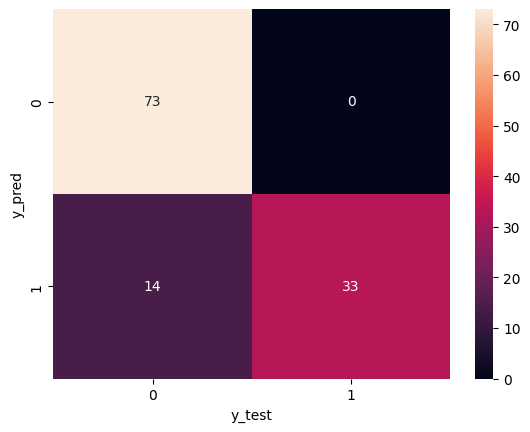

In [ ]:
import seaborn as sns


sns.heatmap(confusion_matrix(y_test,y_pred), annot= True)

plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

1.0
0.7021276595744681
0.825


#Árvore de Decisão

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = pd.read_csv('/content/drive/My Drive/Arquivos python/house_prices.csv')

In [ ]:
dados.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,PoolQC_encoded,Fence_encoded,MiscFeature_encoded,SaleType_encoded,SaleCondition_encoded
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,2.485616,1.284247,3.927397,3.960959,1.856164,2.991096,3.504795,3.922603,7.513014,3.770548
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,1.933206,0.892831,0.647822,0.566832,0.496592,0.140703,1.082912,0.404103,1.552100,1.100854
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,4.000000,4.000000,8.000000,4.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,4.000000,4.000000,8.000000,4.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,5.000000,2.000000,4.000000,4.000000,2.000000,3.000000,4.000000,4.000000,8.000000,4.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,6.000000,3.000000,5.000000,5.000000,2.000000,3.000000,4.000000,4.000000,8.000000,5.000000


In [ ]:
colunas = dados.dtypes.reset_index()

cont_cols = colunas[colunas[0] != 'object']['index'].to_list()


# Preenchendo as variáveis com dados nulos com a média


for i in cont_cols:
    dados[i] = dados[i].fillna(dados[i].mean())

In [ ]:
dados.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,PoolQC_encoded,Fence_encoded,MiscFeature_encoded,SaleType_encoded,SaleCondition_encoded
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,1,4,4,2,3,4,4,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,1,4,4,2,3,4,4,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,1,4,4,2,3,4,4,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,5,2,4,4,2,3,4,4,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,1,1,4,4,2,3,4,4,8,4
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,1,2,4,4,2,3,2,4,8,4
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,1,1,4,4,2,3,0,2,8,4
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,1,2,4,4,2,3,4,4,8,4


In [ ]:
colunas = dados.dtypes.reset_index()

categ_cols = colunas[colunas[0] == 'object']['index'].to_list()


# Fazendo o Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()



for i in categ_cols:
    le.fit(dados[i])
    dados[str(i) + '_encoded'] = le.transform(dados[i])
    dados = dados.drop(i, axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

x = dados.drop('SalePrice', axis = 1)
y = dados['SalePrice']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


modelo = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=20)

modelo.fit(x_train, y_train)
y_pred_train = modelo.predict(x_train)
y_pred_test = modelo.predict(x_test)

print(r2_score(y_train,y_pred_train))

0.8500042666239871


In [ ]:
print(r2_score(y_test,y_pred_test))

0.744082628237343


In [ ]:
depth = [10, 50, 100, 500]
leaf = [20, 50, 100, 500]

for i,j in zip(depth, leaf):

    print('Depth = ', i)
    print('Leaf = ', j)
    modelo = DecisionTreeRegressor(max_depth=i, max_leaf_nodes=j, random_state=42)
    modelo.fit(x_train, y_train)
    y_pred_train = modelo.predict(x_train)
    y_pred_test = modelo.predict(x_test)

    print('Score de Treino é :',r2_score(y_train,y_pred_train))
    print('Score de Teste é :',r2_score(y_test,y_pred_test))

Depth =  10
Leaf =  20
Score de Treino é : 0.8500042666239871
Score de Teste é : 0.744082628237343
Depth =  50
Leaf =  50
Score de Treino é : 0.9245826019679445
Score de Teste é : 0.7574574090449371
Depth =  100
Leaf =  100
Score de Treino é : 0.9636335393240467
Score de Teste é : 0.7510185496714253
Depth =  500
Leaf =  500
Score de Treino é : 0.9993207483633936
Score de Teste é : 0.7282703733610336


O Modelo performou melhor por volta de 100 nos parâmetros testados. É possível notar um Overfitting para parâmetros com valores muito elevados

#Random Forest - Bagging

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dados = pd.read_excel('/content/drive/My Drive/Arquivos python/Data_Train.xlsx')

In [ ]:
dados

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
dados.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
dados.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Tratando os dados da base

In [ ]:
dados['day'] = pd.Series()
dados['month'] = pd.Series()
dados['year'] = pd.Series()

from datetime import datetime


for i in dados.index:
    
    dados['day'][i] = datetime.strptime(dados.Date_of_Journey[i], '%d/%m/%Y').day
    dados['month'][i] = datetime.strptime(dados.Date_of_Journey[i], '%d/%m/%Y').month
    dados['year'][i] = datetime.strptime(dados.Date_of_Journey[i], '%d/%m/%Y').year


<ipython-input-7-0ebd57611116>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['day'] = pd.Series()
<ipython-input-7-0ebd57611116>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['month'] = pd.Series()
<ipython-input-7-0ebd57611116>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['year'] = pd.Series()
<ipython-input-7-0ebd57611116>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['day'][i] = datetime.strptime(dados.Date_of_Journey

In [ ]:
dados

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24.0,3.0,2019.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1.0,5.0,2019.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9.0,6.0,2019.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12.0,5.0,2019.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1.0,3.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9.0,4.0,2019.0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27.0,4.0,2019.0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27.0,4.0,2019.0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1.0,3.0,2019.0


In [ ]:
#trabalhando a hora

In [ ]:
dados = dados.drop('Date_of_Journey', axis = 1)

Utilizando técnica de slicing para pegar horas e minutos

In [ ]:
dados['departure_hour'] = pd.Series()
dados['departure_min'] = pd.Series()
dados['arrival_hour'] = pd.Series()
dados['arrival_min'] = pd.Series()


for i in dados.index:
    
    dados['departure_hour'][i]= dados.Dep_Time[i][0:2]
    dados['departure_min'][i] = dados.Dep_Time[i][3:6]
    dados['arrival_hour'][i] = dados.Arrival_Time[i][0:2]
    dados['arrival_min'][i] = dados.Arrival_Time[i][3:6]

<ipython-input-10-507458aef805>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['departure_hour'] = pd.Series()
<ipython-input-10-507458aef805>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['departure_min'] = pd.Series()
<ipython-input-10-507458aef805>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['arrival_hour'] = pd.Series()
<ipython-input-10-507458aef805>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['arrival_min'] = pd.Series()
<ipython-input-10-507458aef805>:9: SettingWithCopyWarning: 
A 

In [ ]:
dados = dados.drop('Dep_Time', axis = 1)
dados = dados.drop('Arrival_Time', axis = 1)

In [ ]:
dados.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
dados.Total_Stops = dados.Total_Stops.fillna('non-stop')
dados['stops'] = pd.Series()

for i in dados.index:
    if dados.Total_Stops[i] == 'non-stop':
        dados.stops[i] =0
    else:
        dados.stops[i] = dados.Total_Stops[i][0:2]

<ipython-input-13-5640c32c0051>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['stops'] = pd.Series()
<ipython-input-13-5640c32c0051>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.stops[i] =0
<ipython-input-13-5640c32c0051>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.stops[i] = dados.Total_Stops[i][0:2]


In [ ]:
dados = dados.drop('Total_Stops', axis = 1)

Aplicando label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

colunas = dados.dtypes.reset_index()

categ_cols = colunas[colunas[0] == 'object']['index'].to_list()


# Preenchendo as variáveis com dados nulos com a média


for i in categ_cols:
    dados[i] = dados[i].astype(str)  # converter para string
    le = LabelEncoder()
    dados[str(i) +'_encoded'] = le.fit_transform(dados[i])
    dados = dados.drop(i,axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

x = dados.drop('Price', axis = 1)
y = dados['Price']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


modelo = RandomForestRegressor(max_depth=10, max_leaf_nodes=20, random_state=42)

modelo.fit(x_train, y_train)
y_pred_train = modelo.predict(x_train)
y_pred_test = modelo.predict(x_test)

print('O resultado na base de treino é: ',r2_score(y_train,y_pred_train))
print('O resultado na base de teste é: ',r2_score(y_test,y_pred_test))

O resultado na base de treino é:  0.7684230534004771
O resultado na base de teste é:  0.7475835509623059


In [ ]:
depth = [10, 50, 100, 500]
leaf = [20, 50, 100, 500]
n_estimators = [10, 20, 30, 50, 500]

for i,j,k in zip(depth, leaf, n_estimators):

    print('Depth = ', i)
    print('Leaf = ', j)
    modelo = RandomForestRegressor(max_depth=i, max_leaf_nodes=j, n_estimators = k ,random_state=42)
    modelo.fit(x_train, y_train)
    y_pred_train = modelo.predict(x_train)
    y_pred_test = modelo.predict(x_test)

    print('Score de Treino é :',r2_score(y_train,y_pred_train))
    print('Score de Teste é :',r2_score(y_test,y_pred_test))

Depth =  10
Leaf =  20
Score de Treino é : 0.7612662638608225
Score de Teste é : 0.7340813219892548
Depth =  50
Leaf =  50
Score de Treino é : 0.8481385431105789
Score de Teste é : 0.8142728424691522
Depth =  100
Leaf =  100
Score de Treino é : 0.905005848694683
Score de Teste é : 0.8634664141739196
Depth =  500
Leaf =  500
Score de Treino é : 0.9688287681835229
Score de Teste é : 0.900830248993637


O Modelo performou melhor por volta de 500 nos parâmetros testados. Mesmo assim podemos ver que o modelo não foi tão afetado pelo Overfitting

#Boosting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = pd.read_excel('/content/drive/My Drive/Arquivos python/Data_Train.xlsx')

In [ ]:
dados.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
dados['day'] = pd.Series()
dados['month'] = pd.Series()
dados['year'] = pd.Series()

from datetime import datetime


for i in dados.index:
    
    dados['day'][i] = datetime.strptime(dados.Date_of_Journey[i], '%d/%m/%Y').day
    dados['month'][i] = datetime.strptime(dados.Date_of_Journey[i], '%d/%m/%Y').month
    dados['year'][i] = datetime.strptime(dados.Date_of_Journey[i], '%d/%m/%Y').year

<ipython-input-23-0ebd57611116>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['day'] = pd.Series()
<ipython-input-23-0ebd57611116>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['month'] = pd.Series()
<ipython-input-23-0ebd57611116>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['year'] = pd.Series()
<ipython-input-23-0ebd57611116>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['day'][i] = datetime.strptime(dados.Date_of_Jou

In [ ]:
dados = dados.drop('Date_of_Journey', axis = 1)

In [ ]:
dados['departure_hour'] = pd.Series()
dados['departure_min'] = pd.Series()
dados['arrival_hour'] = pd.Series()
dados['arrival_min'] = pd.Series()


for i in dados.index:
    
    dados['departure_hour'][i]= dados.Dep_Time[i][0:2]
    dados['departure_min'][i] = dados.Dep_Time[i][3:6]
    dados['arrival_hour'][i] = dados.Arrival_Time[i][0:2]
    dados['arrival_min'][i] = dados.Arrival_Time[i][3:6]

<ipython-input-25-507458aef805>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['departure_hour'] = pd.Series()
<ipython-input-25-507458aef805>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['departure_min'] = pd.Series()
<ipython-input-25-507458aef805>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['arrival_hour'] = pd.Series()
<ipython-input-25-507458aef805>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['arrival_min'] = pd.Series()
<ipython-input-25-507458aef805>:9: SettingWithCopyWarning: 
A 

In [ ]:
dados = dados.drop('Dep_Time', axis = 1)
dados = dados.drop('Arrival_Time', axis = 1)

In [ ]:
dados.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
dados.Total_Stops = dados.Total_Stops.fillna('non-stop')
dados['stops'] = pd.Series()

for i in dados.index:
    if dados.Total_Stops[i] == 'non-stop':
        dados.stops[i] =0
    else:
        dados.stops[i] = dados.Total_Stops[i][0:2]

<ipython-input-28-5640c32c0051>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados['stops'] = pd.Series()
<ipython-input-28-5640c32c0051>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.stops[i] =0
<ipython-input-28-5640c32c0051>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.stops[i] = dados.Total_Stops[i][0:2]


In [ ]:
dados = dados.drop('Total_Stops', axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

colunas = dados.dtypes.reset_index()

categ_cols = colunas[colunas[0] == 'object']['index'].to_list()


# Preenchendo as variáveis com dados nulos com a média


for i in categ_cols:
    dados[str(i) +'_encoded'] = le.fit_transform(dados[i])
    dados = dados.drop(i,axis = 1)

TypeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

x = dados.drop('Price', axis = 1)
y = dados['Price']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
#Iremos fazer o mesmo processo para os 3 modelos que falamos para verificar as 

# 1.   Item da lista
# 2.   Item da lista

# diferenças
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

import time

modelo_gr = GradientBoostingRegressor(max_depth=10, max_leaf_nodes=20, random_state=42)
modelo_xb = XGBRegressor(max_depth=10, max_leaf_nodes=20, random_state=42)
modelo_lg = LGBMRegressor(max_depth=10, max_leaf_nodes=20, random_state=42)

print('=========== Gradient Boosting ==============')

start = time.time()
modelo_gr.fit(x_train, y_train)
end = time.time()
y_pred_train = modelo_gr.predict(x_train)
y_pred_test = modelo_gr.predict(x_test)

print('O resultado na base de treino é: ',r2_score(y_train,y_pred_train))
print('O resultado na base de teste é: ',r2_score(y_test,y_pred_test))
print('O tempo que o modelo demorou para treinar foi: ', str(end-start))

print('=========== XG Boost ==============')

start = time.time()
modelo_xb.fit(x_train, y_train)
end = time.time()
y_pred_train = modelo_xb.predict(x_train)
y_pred_test = modelo_xb.predict(x_test)


print('O resultado na base de treino é: ',r2_score(y_train,y_pred_train))
print('O resultado na base de teste é: ',r2_score(y_test,y_pred_test))
print('O tempo que o modelo demorou para treinar foi: ', str(end-start))


print('=========== LGBM ==============')

start = time.time()
modelo_lg.fit(x_train, y_train)
end = time.time()
y_pred_train = modelo_lg.predict(x_train)
y_pred_test = modelo_lg.predict(x_test)

print('O resultado na base de treino é: ',r2_score(y_train,y_pred_train))
print('O resultado na base de teste é: ',r2_score(y_test,y_pred_test))
print('O tempo que o modelo demorou para treinar foi: ', str(end-start))

=========== Gradient Boosting ==============
O resultado na base de treino é:  0.9344290466709527
O resultado na base de teste é:  0.8935085383135426
O tempo que o modelo demorou para treinar foi:  1.4128804206848145
=========== XG Boost ==============


ValueError: ignored

#Feature Selection